# K-nearest neighbours

## Import dataset

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/home/vutaliy/Downloads/dataset_191_wine.csv')
# dataset = pd.read_csv('/home/vutaliy/Downloads/dataset_54_vehicle.csv')
dataset.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Scaler

In [2]:
def min_max(objs, size):
    mins_and_maxs = {}
    index = 0
    for i in dataset: # calculate mins and maxs 
        if (i == "class"): # skip main class
            continue

        minimum = dataset[i].min()
        mins_and_maxs[index] = (minimum, dataset[i].max())
        index += 1
    
    for i in range(len(objs)):
        for j in range(len(objs[0])):
            objs[i][j] = (objs[i][j] - mins_and_maxs[j][0]) / (mins_and_maxs[j][1] - mins_and_maxs[j][0])
    

## Normalization and One-Hot encoding

In [3]:
from sklearn.preprocessing import MinMaxScaler

default_objects = dataset.to_numpy()

main_attribute = pd.unique(dataset['class']) # get main attribute values
# main_attribute = pd.unique(dataset['Сlass']) # get main attribute values

objects_amount, attributes_amount = dataset.shape # get objects and attributes amounts

zeros = np.zeros(objects_amount) # create zeros matrix with main_attribute size 
for i in range(len(main_attribute)-1):
    zeros = np.c_[zeros, np.zeros(objects_amount)]

objects = dataset.iloc[:, 1:].to_numpy() # slice before main attribute and convert to numpy
# objects = dataset.iloc[:, :attributes_amount-1].to_numpy() # slice before main attribute and convert to numpy\n",

# my scaler
min_max(objects, attributes_amount)

# sklearn scaler
# scaler = MinMaxScaler()
# scaler.fit(objects)
# objects = scaler.transform(objects)

print("objects amount:", objects_amount)
print("attributes amount: ", attributes_amount)

objects = np.c_[objects, zeros] # create matrix with new attributes
main_attribute = { main_attribute[i] : i for i in range(len(main_attribute) ) } # define main_attribute as dict


for i in range(objects_amount): # convert main attribute to several attributes
    objects[i][attributes_amount - 1 + main_attribute[default_objects[i][0]]] = 1 
    # objects[i][attributes_amount - 1 + main_attribute[default_objects[i][attributes_amount - 1]]] = 1 


print(default_objects)
print(objects)
print(main_attribute)

objects amount: 178
attributes amount:  14
[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[[0.84210526 0.1916996  0.57219251 ... 1.         0.         0.        ]
 [0.57105263 0.2055336  0.4171123  ... 1.         0.         0.        ]
 [0.56052632 0.3201581  0.70053476 ... 1.         0.         0.        ]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.         0.         1.        ]
 [0.56315789 0.36561265 0.54010695 ... 0.         0.         1.        ]
 [0.81578947 0.66403162 0.73796791 ... 0.         0.         1.        ]]


## Metrics and Kernel functions

In [4]:
from math import sqrt, pi, e, cos

def euclidian_distance(vec1, vec2):
    ans = 0
    for i in range(len(vec1)):
        ans += (vec1[i] - vec2[i]) ** 2
    return sqrt(ans)

def manhattan_distance(vec1, vec2):
    ans = 0
    for i in range(len(vec1)):
        ans += abs(vec1[i] - vec2[i])
    return ans

def chebishev_distance(vec1, vec2):
    ans = float("-inf")
    for i in range(len(vec1)):
        ans = max(ans, abs(vec1[i] - vec2[i]))
    return ans

def in_range_one(variable, value):
    return value if abs(variable) < 1 else 0

kernel_functions = {
    "uniform":      lambda u: in_range_one(u, 0.5),
    "triangular":   lambda u: in_range_one(u, 1 - abs(u)),
    "epanechnikov": lambda u: in_range_one(u, 0.75 * (1 - u ** 2)),
    "quartic":      lambda u: in_range_one(u, (15 / 16) * (1 - u ** 2) ** 2),
    # "triweight":    lambda u: in_range_one(u, (35 / 32) * (1 - u ** 2) ** 3),
    # "tricube":      lambda u: in_range_one(u, (70 / 81) * (1 - abs(u) ** 3) ** 3),
    # "gaussian":     lambda u: (1 / (2 * pi) ** (0.5)) * e ** (-0.5 * u ** 2),
    # "cosine":       lambda u: in_range_one(u, (pi / 4) * cos(pi * u / 2)),
    # "logistic":     lambda u: 1 / (e ** u + 2 + e ** (-u)),
    # "sigmoid":      lambda u: 2 / (pi * (e ** u + e ** (-u)))
}

distance_functions = {
    "euclidian": euclidian_distance,
    "manhattan": manhattan_distance,
    "chebyshev": chebishev_distance
}

print(euclidian_distance([0,0,1],[0,1,0]))
print(manhattan_distance([0,0,1],[0,1,0]))
print(chebishev_distance([0,0,1],[0,1,0]))

1.4142135623730951
2
1


## Precalculate distances

In [5]:
distances_by_fun = {
    "euclidian": [],
    "manhattan": [],
    "chebyshev": []
}

max_distance = {
    "euclidian": [],
    "manhattan": [],
    "chebyshev": []
}

def calculate_distances():
    for dis_fun_name in distance_functions.keys():
        for obj1 in objects:
            buff = []
            max_d = float("-inf")

            for obj2 in objects:
                local_distance = distance_functions[dis_fun_name](obj1[:len(obj1)-len(main_attribute)], obj2[:len(obj2)-len(main_attribute)])
                max_d = max_d if max_d > local_distance else local_distance
                buff.append(local_distance) 
            
            distances_by_fun[dis_fun_name].append(buff)
            max_distance[dis_fun_name].append(max_d)

        print(dis_fun_name, "done")

calculate_distances()

euclidian done
manhattan done
chebyshev done


## Nadaraya-Watson

In [6]:
def kernel_regression(objs, index, neighbours = 0, window_size = 0., distance_function_name = "euclidian", kernel_function_name = "triangular"):
    distance_function = distance_functions[distance_function_name]
    kernel_function = kernel_functions[kernel_function_name]

    distances = np.array(distances_by_fun[distance_function_name][index])
    sorted = distances.copy()
    sorted.sort()

    window_parameter = 0.
    if (neighbours == 0):
        window_parameter = window_size 
    else:
        window_parameter = sorted[neighbours + 2] # k_stat(distances, neighbours)
    
    sum = [0.] * len(main_attribute)
    sum = np.array(sum)
    denominator = 0.

    for i in range(len(objs)):

        if i == index: #loo
            continue

        buff = kernel_function(distances[i] / window_parameter)
        sum += objs[i][len(objs[i])-len(main_attribute):] * buff
        denominator += buff
    
    return sum / denominator if denominator != 0 else suma(objs) / len(objs)

def suma(objs):
    buff = [0.] * len(main_attribute)
    for i in range(len(objs)):
        buff += objs[i][len(objs[i])-len(main_attribute):]
    return buff

## Calculate predicted

In [7]:
predicted_with_fixed = {}
predicted_with_variable = {}

def calculate_predicted():
    for ker_fun_name in kernel_functions.keys(): # change parameters
        for dis_fun_name in distance_functions.keys():
            for i in range(len(objects)):

                tup = (ker_fun_name, dis_fun_name, i)
                # print(i)
                max_d = max_distance[dis_fun_name][i]
                ws_fixed = max_d / sqrt(len(objects))
                
                predicted_with_fixed[tup] = []
                while ws_fixed < max_d:
                    predicted_with_fixed[tup].append(kernel_regression(objects, i, window_size = ws_fixed, distance_function_name = dis_fun_name, kernel_function_name = ker_fun_name))
                    ws_fixed += max_d/sqrt(len(objects))

                predicted_with_variable[tup] = []
                for ws_variable in range(1, int(sqrt(len(objects))) ):
                    predicted_with_variable[tup].append(kernel_regression(objects, i, neighbours = ws_variable, distance_function_name = dis_fun_name, kernel_function_name = ker_fun_name))

calculate_predicted()

In [13]:
print("pred_with_variable:", predicted_with_variable)
print("pred_with_fixed:", predicted_with_fixed)

563215, 0.40111553, 0.39325231]), array([0.23163976, 0.40117524, 0.36718501]), array([0.25114776, 0.40053043, 0.34832181])], ('quartic', 'chebyshev', 143): [array([0.33146067, 0.3988764 , 0.26966292]), array([0.33146067, 0.3988764 , 0.26966292]), array([0.33146067, 0.3988764 , 0.26966292]), array([0.        , 0.04187365, 0.95812635]), array([0.        , 0.16836928, 0.83163072]), array([0.00302637, 0.14691331, 0.85006032]), array([0.0262061 , 0.15707371, 0.81672018]), array([0.04638198, 0.18048859, 0.77312943]), array([0.06852041, 0.20036479, 0.7311148 ]), array([0.11122288, 0.22070395, 0.66807317]), array([0.17512914, 0.24214847, 0.5827224 ]), array([0.22546625, 0.26494042, 0.50959333]), array([0.25699916, 0.2880676 , 0.45493324])], ('quartic', 'chebyshev', 144): [array([0.33146067, 0.3988764 , 0.26966292]), array([0.33146067, 0.3988764 , 0.26966292]), array([0.33146067, 0.3988764 , 0.26966292]), array([0., 0., 1.]), array([0., 0., 1.]), array([2.70961007e-04, 0.00000000e+00, 9.9972903

## F-score

In [12]:
def f_score(matrix, f_type) :

    def row(i):
        ans = 0
        for j in range(n):
            ans += matrix[j][i]
        return ans

    def col(i):
        ans = 0
        for j in range(n):
            ans += matrix[i][j] 
        return ans

    def all_():
        ans = 0
        for row in matrix:
            for item in row:
                ans += item
        return ans

    alll = all_()

    def prec_i(i):
        ans = 0
        for j in range(n):
            ans += matrix[j][i]
        if (ans == 0): return 1
        return matrix[i][i] / ans 

    def recall_i(i):
        ans = 0
        for j in range(n):
            ans += matrix[i][j]
        if (ans == 0): return 1
        return matrix[i][i] / ans

    def f_beta(i, beta):
        recall = recall_i(i)
        precision = prec_i(i)
        weight = pow(beta,2)
        denominator = (weight * precision + recall)
        if (denominator == 0): return 0
        return (1 + weight) * precision * recall / denominator

    def f_micro(beta):
        ans = 0
        for i in range(n):
            ans += row(i) * f_beta(i, beta)
        return ans / alll 

    def prec_w():
        ans = 0
        for i in range(n):
            col_ = col(i)
            if (col_ != 0):
                ans += matrix[i][i] * row(i) / col(i)
        return ans / alll

    def recall_w():
        ans = 0
        for i in range(n):
            ans += matrix[i][i]
        return ans / alll

    def f_macro(beta):
        precision = prec_w()
        recall = recall_w()
        weight = pow(beta,2)
        return (1 + weight) * precision * recall / (weight * precision + recall)

    return f_macro(1) if f_type == "macro" else f_micro(1)
  

## Generate confusion matrix

In [ ]:
def generate_matrix():
    


In [75]:
from sklearn.metrics import f1_score

converted_pred_data = []
converted_answers = []


def convert_pred_data():
    
    for pred in preds:
        buff = []
        for i in pred[3]:
            buff.append(i.tolist().index(max(i.tolist())))
        converted_pred_data.append(buff)

    for j in answers:
        converted_answers.append(j.tolist().index(max(j.tolist())))

def score():
    for i in range(len(converted_pred_data)):
        print(preds[i][0], preds[i][1], preds[i][2])
        buff = f1_score(converted_answers, converted_pred_data[i], average="micro")
        scores.append(buff)
        print(buff)
    

convert_pred_data()
# print(len(converted_pred_data))
scores = []
score()

uniform euclidian 2
0.9662921348314607
uniform euclidian 3
0.9550561797752809
uniform euclidian 4
0.949438202247191
uniform euclidian 5
0.9550561797752809
uniform euclidian 6
0.9662921348314607
uniform euclidian 7
0.9550561797752809
uniform euclidian 8
0.9550561797752809
uniform euclidian 9
0.9662921348314607
uniform euclidian 10
0.9662921348314607
uniform euclidian 11
0.9550561797752809
uniform euclidian 12
0.9775280898876404
uniform manhattan 2
0.9662921348314607
uniform manhattan 3
0.9719101123595506
uniform manhattan 4
0.9662921348314607
uniform manhattan 5
0.9606741573033708
uniform manhattan 6
0.9662921348314607
uniform manhattan 7
0.9662921348314607
uniform manhattan 8
0.9775280898876404
uniform manhattan 9
0.9775280898876404
uniform manhattan 10
0.9831460674157303
uniform manhattan 11
0.9775280898876404
uniform manhattan 12
0.9831460674157303
uniform chebyshev 2
0.949438202247191
uniform chebyshev 3
0.9382022471910112
uniform chebyshev 4
0.9325842696629213
uniform chebyshev 5
0

In [74]:
# for i in range(len(scores)):
#     print(preds[i][0], preds[i][1], preds[i][2])
#     print(scores[i])

## Graphics

0 0.9662921348314607
10 0.9775280898876404
20 0.9775280898876404
30 0.9325842696629213
40 0.9719101123595506
50 0.9606741573033708
60 0.9438202247191011
70 0.9606741573033708
80 0.9606741573033708
90 0.949438202247191
100 0.949438202247191
110 0.9606741573033708
120 0.9606741573033708
130 0.9550561797752809
0 0.9662921348314607
10 0.9775280898876404
20 0.9775280898876404
30 0.9325842696629213
40 0.9719101123595506
50 0.9606741573033708
60 0.9438202247191011
70 0.9606741573033708
80 0.9606741573033708
90 0.949438202247191
100 0.949438202247191
110 0.9606741573033708
120 0.9606741573033708
130 0.9550561797752809
0 0.9662921348314607
10 0.9775280898876404
20 0.9775280898876404
30 0.9325842696629213
40 0.9719101123595506
50 0.9606741573033708
60 0.9438202247191011
70 0.9606741573033708
80 0.9606741573033708
90 0.949438202247191
100 0.949438202247191
110 0.9606741573033708
120 0.9606741573033708
130 0.9550561797752809
0 0.9662921348314607
10 0.9775280898876404
20 0.9775280898876404
30 0.932

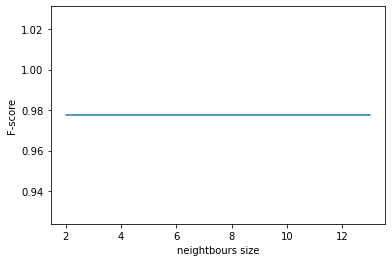

In [102]:
import matplotlib.pyplot as plt
plt.xlabel('neighbours amount')
plt.ylabel('F-score')

forplot = []

max_size = int(sqrt(len(objects-1)))

for j in range (2,  max_size+1):
    buff = []
    for i in range(0, len(converted_pred_data), max_size - 3):
        print(i,f1_score(converted_answers, converted_pred_data[i], average="micro"))

        buff.append(f1_score(converted_answers, converted_pred_data[i], average="micro"))
    forplot.append(buff)

print(forplot)
l = [i for i in range(2, max_size+1)]
l2 = [max(i) for i in forplot]

print(len(l2), len(l))

print(l2)
print(l)

plt.plot(l, l2)

for j in range(0, max_size):
    
